<a href="https://colab.research.google.com/github/TravisJRCain/DS-Unit-2-Applied-Modeling/blob/master/module3-permutation-boosting/Travis_Cain_LS_DS14_233_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---


# Permutation & Boosting

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] If you haven't completed assignment #1, please do so first.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline? 
- [ ] Try xgboost.
- [ ] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.

But, if you aren't ready to try xgboost and permutation importances with your dataset today, that's okay. You can practice with another dataset instead. You may choose any dataset you've worked with previously.

The data subdirectory includes the Titanic dataset for classification and the NYC apartments dataset for regression. You may want to choose one of these datasets, because example solutions will be available for each.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 8
  - _**[Gradient Boosting Explained](https://www.gormanalysis.com/blog/gradient-boosting-explained/)**_ — Ben Gorman
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html) — Alex Rogozhnikov
  - [How to explain gradient boosting](https://explained.ai/gradient-boosting/) — Terence Parr & Jeremy Howard

In [29]:
### PyBaseball ###
pip install pybaseball

In [0]:
from pybaseball import statcast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
from pybaseball import batting_stats
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

In [31]:
df = batting_stats(2012, 2019, league='all')
df.head()

,Season,Name,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,GB,FB,LD,IFFB,Pitches,Balls,Strikes,IFH,BU,BUH,BB%,K%,BB/K,OBP,SLG,OPS,...,CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi)
140,2018.0,Mookie Betts,Red Sox,25.0,136.0,520.0,614.0,180.0,96.0,47.0,5.0,32.0,129.0,80.0,81.0,8.0,91.0,8.0,5.0,0.0,5.0,30.0,6.0,0.346,147.0,195.0,92.0,18.0,2582.0,1095.0,1487.0,14.0,0.0,0.0,0.132,0.148,0.89,0.438,0.640,1.078,...,NaN,-6.2,9.0,4.9,2.1,NaN,NaN,5.3,0.6,NaN,10.2,NaN,0.4,19.6,4.6,4.0,NaN,NaN,20.3,10.1,NaN,3.62,NaN,0.23,1.96,3.87,6.68,NaN,NaN,4.98,1.93,NaN,0.185,0.535,0.356,0.658,0.926,0.855,0.490,23.3
233,2013.0,Mike Trout,Angels,21.0,157.0,589.0,716.0,190.0,115.0,39.0,9.0,27.0,109.0,97.0,110.0,10.0,136.0,9.0,8.0,0.0,8.0,33.0,7.0,0.323,191.0,164.0,106.0,6.0,3015.0,1295.0,1720.0,31.0,0.0,0.0,0.154,0.190,0.81,0.432,0.557,0.988,...,-13.3,-5.6,9.7,5.4,2.8,0.8,NaN,6.2,1.1,NaN,8.8,-0.2,2.0,19.9,1.6,1.8,-0.2,NaN,27.2,4.9,NaN,3.55,-17.26,0.78,1.65,0.98,3.57,-1.48,NaN,4.67,1.06,NaN,0.236,0.530,0.375,0.696,0.882,0.821,0.475,24.9
280,2012.0,Mike Trout,Angels,20.0,139.0,559.0,639.0,182.0,117.0,27.0,8.0,30.0,129.0,83.0,67.0,4.0,139.0,6.0,7.0,0.0,7.0,49.0,5.0,0.326,187.0,139.0,95.0,6.0,2608.0,992.0,1616.0,22.0,6.0,3.0,0.105,0.218,0.48,0.399,0.564,0.963,...,-9.6,-5.2,9.3,5.4,3.2,NaN,NaN,5.8,1.1,NaN,9.5,0.0,1.0,7.0,5.4,0.6,NaN,NaN,11.5,15.1,NaN,6.31,0.23,0.49,0.63,3.68,1.66,NaN,NaN,2.11,3.91,NaN,0.248,0.533,0.396,0.700,0.867,0.817,0.518,23.7
287,2012.0,Buster Posey,Giants,25.0,148.0,530.0,610.0,178.0,114.0,39.0,1.0,24.0,78.0,103.0,69.0,7.0,96.0,2.0,9.0,0.0,19.0,1.0,1.0,0.336,206.0,128.0,109.0,5.0,2599.0,1027.0,1572.0,17.0,0.0,0.0,0.113,0.157,0.72,0.408,0.549,0.957,...,-7.0,-5.4,9.3,5.2,3.3,NaN,NaN,5.7,1.1,NaN,12.8,0.1,-2.0,14.0,5.2,3.2,NaN,NaN,12.9,-4.9,NaN,6.48,3.76,-0.69,1.76,2.30,12.98,NaN,NaN,2.15,-1.11,NaN,0.251,0.588,0.418,0.742,0.899,0.852,0.496,22.9
145,2018.0,Mike Trout,Angels,26.0,140.0,471.0,608.0,147.0,80.0,24.0,4.0,39.0,101.0,79.0,122.0,25.0,124.0,10.0,4.0,0.0,5.0,24.0,2.0,0.312,110.0,159.0,82.0,15.0,2543.0,1075.0,1468.0,11.0,0.0,0.0,0.201,0.204,0.98,0.460,0.628,1.088,...,NaN,-6.2,9.0,5.2,2.3,NaN,NaN,5.0,0.8,12.2,9.5,NaN,3.5,21.4,5.2,0.7,NaN,NaN,11.3,10.6,-0.1,5.81,NaN,1.65,1.92,2.57,2.83,NaN,NaN,2.80,2.55,-5.67,0.198,0.555,0.376,0.660,0.903,0.839,0.498,23.3


In [34]:
df.shape

(7726, 287)

In [0]:
# Predicting if Juan Soto will hit a HR or not
# How many HRs will Juan Soto hit in 2020

In [36]:
juan_soto = df.loc[df['Name'] == 'Juan Soto']
juan_soto

,Season,Name,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,GB,FB,LD,IFFB,Pitches,Balls,Strikes,IFH,BU,BUH,BB%,K%,BB/K,OBP,SLG,OPS,...,CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi)
357,2019.0,Juan Soto,Nationals,20.0,150.0,542.0,659.0,153.0,82.0,32.0,5.0,34.0,110.0,110.0,108.0,3.0,132.0,3.0,6.0,0.0,11.0,12.0,1.0,0.282,171.0,153.0,87.0,7.0,2791.0,1202.0,1589.0,8.0,5.0,1.0,0.164,0.2,0.82,0.401,0.548,0.949,...,-7.0,-6.5,8.3,3.8,1.6,NaN,NaN,4.3,0.6,NaN,7.3,-0.1,6.9,10.3,3.3,2.0,NaN,NaN,11.7,-2.1,NaN,1.87,-4.32,2.49,1.15,2.57,3.38,NaN,NaN,2.47,-0.38,NaN,0.205,0.655,0.407,0.575,0.857,0.779,0.449,27.9
370,2018.0,Juan Soto,Nationals,19.0,116.0,414.0,494.0,121.0,73.0,25.0,1.0,22.0,77.0,70.0,79.0,10.0,99.0,0.0,0.0,1.0,9.0,5.0,2.0,0.292,166.0,89.0,54.0,7.0,2031.0,839.0,1192.0,7.0,7.0,5.0,0.160,0.2,0.80,0.406,0.517,0.923,...,NaN,-6.2,8.5,4.5,1.9,NaN,NaN,5.1,0.9,NaN,-1.2,NaN,0.4,27.2,-1.3,0.5,NaN,NaN,5.5,-1.0,NaN,-0.44,NaN,0.16,3.99,-1.24,0.83,NaN,NaN,1.95,-0.26,NaN,0.207,0.603,0.387,0.671,0.853,0.800,0.456,24.4


In [0]:
# Predicting HR's with certain variables

df_HR = df['HR']

In [38]:
df_HR

140     32.0
233     27.0
280     30.0
287     24.0
145     39.0
        ... 
4207     9.0
4563     1.0
5212     2.0
3836    11.0
4552    16.0
Name: HR, Length: 7726, dtype: float64

In [0]:
train = df[df['Season'] <= 2015.0]
val = df[df['Season'] == 2016.0]
test = df[df['Season'] >= 2017.0]

In [41]:
train.shape, val.shape, test.shape

((3820, 287), (969, 287), (2937, 287))

In [0]:
features = train.columns.tolist()
target = 'HR'

In [0]:
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]
X_val = val[features]
y_val = val[target]

In [75]:
pip install category_encoders

In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

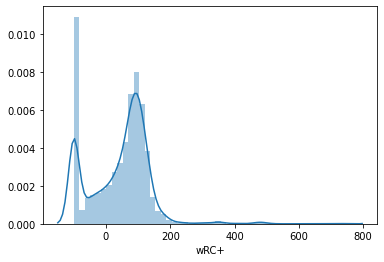

In [77]:
import seaborn as sns
sns.distplot(df['wRC+']);

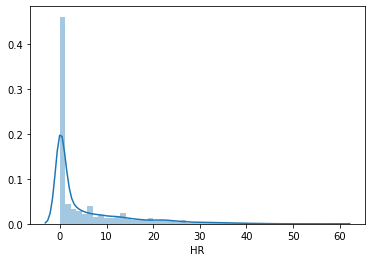

In [139]:
sns.distplot(df['HR']);

In [140]:
### Baseline ###

df['HR'].mean()

5.5353352316852185

In [112]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.7110423116615067


In [118]:
column  = 'K%'

# Fit without column
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train.drop(columns=column), y_train)
score_without = pipeline.score(X_val.drop(columns=column), y_val)
print(f'Validation Accuracy without {column}: {score_without}')

# Fit with column
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train, y_train)
score_with = pipeline.score(X_val, y_val)
print(f'Validation Accuracy with {column}: {score_with}')

# Compare the error with & without column
print(f'Drop-Column Importance for {column}: {score_with - score_without}')

Validation Accuracy without K%: 0.6945304437564499
Validation Accuracy with K%: 0.7110423116615067
Drop-Column Importance for K%: 0.016511867905056765


In [119]:
feature = 'K%'
X_val[feature].head()

246    0.201
476    0.110
342    0.220
303    0.170
561    0.194
Name: K%, dtype: float64

In [120]:
X_val[feature].value_counts()

0.000    60
1.000    52
0.500    41
0.333    26
0.250    14
         ..
0.376     1
0.556     1
0.440     1
0.327     1
0.643     1
Name: K%, Length: 315, dtype: int64

In [121]:
X_val[feature].value_counts(normalize=True)

0.000    0.061920
1.000    0.053664
0.500    0.042312
0.333    0.026832
0.250    0.014448
           ...   
0.376    0.001032
0.556    0.001032
0.440    0.001032
0.327    0.001032
0.643    0.001032
Name: K%, Length: 315, dtype: float64

In [0]:
X_val_permuted = X_val.copy()
X_val_permuted[feature] = np.random.permutation(X_val[feature])

In [123]:
X_val_permuted[feature].head()

246    0.231
476    0.500
342    0.192
303    0.231
561    0.160
Name: K%, dtype: float64

In [124]:
X_val_permuted[feature].value_counts(normalize=True)

0.000    0.061920
1.000    0.053664
0.500    0.042312
0.333    0.026832
0.250    0.014448
           ...   
0.436    0.001032
0.327    0.001032
0.053    0.001032
0.345    0.001032
0.096    0.001032
Name: K%, Length: 315, dtype: float64

In [125]:
# Get the permutation importance
score_permuted = pipeline.score(X_val_permuted, y_val)

print(f'Validation Accuracy with {feature}: {score_with}')
print(f'Validation Accuracy with {feature} permuted: {score_permuted}')
print(f'Permutation Importance: {score_with - score_permuted}')

Validation Accuracy with K%: 0.7110423116615067
Validation Accuracy with K% permuted: 0.7100103199174407
Permutation Importance: 0.0010319917440659854


In [126]:
# Rerun w/ different feature
feature = 'wRC+'
X_val_permuted = X_val.copy()
X_val_permuted[feature] = np.random.permutation(X_val[feature])
score_permuted = pipeline.score(X_val_permuted, y_val)

print(f'Validation Accuracy with {feature}: {score_with}')
print(f'Validation Accuracy with {feature} permuted: {score_permuted}')
print(f'Permutation Importance: {score_with - score_permuted}')

Validation Accuracy with wRC+: 0.7110423116615067
Validation Accuracy with wRC+ permuted: 0.7100103199174407
Permutation Importance: 0.0010319917440659854


In [127]:
### eli5 practice ###

transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [128]:
!pip install eli5

In [0]:
import eli5
from eli5.sklearn import PermutationImportance

In [131]:
permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fr

In [0]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

In [0]:
# Couldn't get this to work
# Error read: 'feature_names has a wrong length: expected=286, got=287'

eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names
)

In [134]:
### xgboost gradient boosting ###

from xgboost import XGBClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Name', 'Team', 'Dol', 'Age Rng'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'Name',
                                          'data_type': dtype('O'),
                                          'mapping': Mike Trout           1
Buster Posey         2
Bryce Harper         3
Josh Donaldson       4
Miguel Cabrera       5
                  ... 
Joe Mather        1607
Wilson Valdez     1608
Josh Vitters      1609
Rod Barajas       1610
NaN                 -2
Le...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                      

In [135]:
from sklearn.metrics import accuracy_score
y_pred = pipeline.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))

Validation Accuracy 0.9876160990712074


In [137]:
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

model = XGBClassifier(
    n_estimators = 1000,
    max_depth=7,
    learning_rate=0.5,
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

model.fit(X_train_encoded, y_train, 
          eval_set=eval_set, 
          eval_metric='merror', 
          early_stopping_rounds=50)

[0]	validation_0-merror:0.020157	validation_1-merror:0.035088
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 50 rounds.
[1]	validation_0-merror:0.009948	validation_1-merror:0.029928
[2]	validation_0-merror:0.003141	validation_1-merror:0.026832
[3]	validation_0-merror:0.001047	validation_1-merror:0.024768
[4]	validation_0-merror:0.001047	validation_1-merror:0.018576
[5]	validation_0-merror:0.001047	validation_1-merror:0.017544
[6]	validation_0-merror:0.001047	validation_1-merror:0.017544
[7]	validation_0-merror:0.000785	validation_1-merror:0.017544
[8]	validation_0-merror:0.000785	validation_1-merror:0.017544
[9]	validation_0-merror:0.000262	validation_1-merror:0.017544
[10]	validation_0-merror:0	validation_1-merror:0.017544
[11]	validation_0-merror:0	validation_1-merror:0.017544
[12]	validation_0-merror:0	validation_1-merror:0.017544
[13]	validation_0-merror:0	validation_1-merror:0.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)